In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names=["userId","item_id","rating","timestamp"]
df = pd.read_csv(r"F:\DS and ML\Data_Sets\Movie Recom\u.data",sep='\t',names=col_names)
df.head()

,userId,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
titles = pd.read_csv("F:\DS and ML\Data_Sets\Movie Recom\Movie_Id_Titles")
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
data = pd.merge(df,titles,on='item_id')
data.head()

,userId,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.2+ MB


In [6]:
data.shape

(100003, 5)

In [7]:
data.title.nunique()

1664

In [8]:
data.rating.nunique()

5

In [9]:
data.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [10]:
data.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [12]:
ratings.shape

(1664, 1)

In [13]:
ratings['No_of_rating'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,No_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

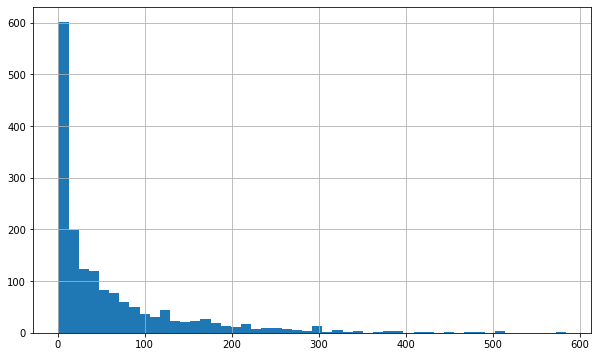

In [14]:
plt.figure(figsize=(10,6))
ratings.No_of_rating.hist(bins=50)

In [15]:
len(ratings[ratings.No_of_rating <100])

1326

<AxesSubplot:>

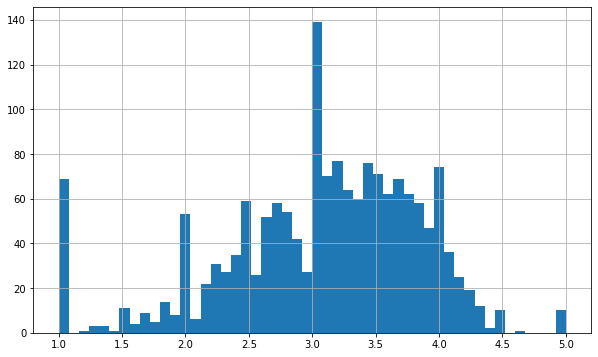

In [16]:
plt.figure(figsize=(10,6))
ratings.rating.hist(bins=50)

In [17]:
ratings[(ratings.rating>4) & (ratings.No_of_rating>100)]

,rating,No_of_rating
title,,
12 Angry Men (1957),4.344000,125
"African Queen, The (1951)",4.184211,152
Alien (1979),4.034364,291
Amadeus (1984),4.163043,276
Apocalypse Now (1979),4.045249,221
...,...,...
To Kill a Mockingbird (1962),4.292237,219
"Usual Suspects, The (1995)",4.385768,267
Vertigo (1958),4.251397,179


In [18]:
x = ratings[(ratings.rating>4) & (ratings.No_of_rating>100)]

<AxesSubplot:xlabel='title', ylabel='rating'>

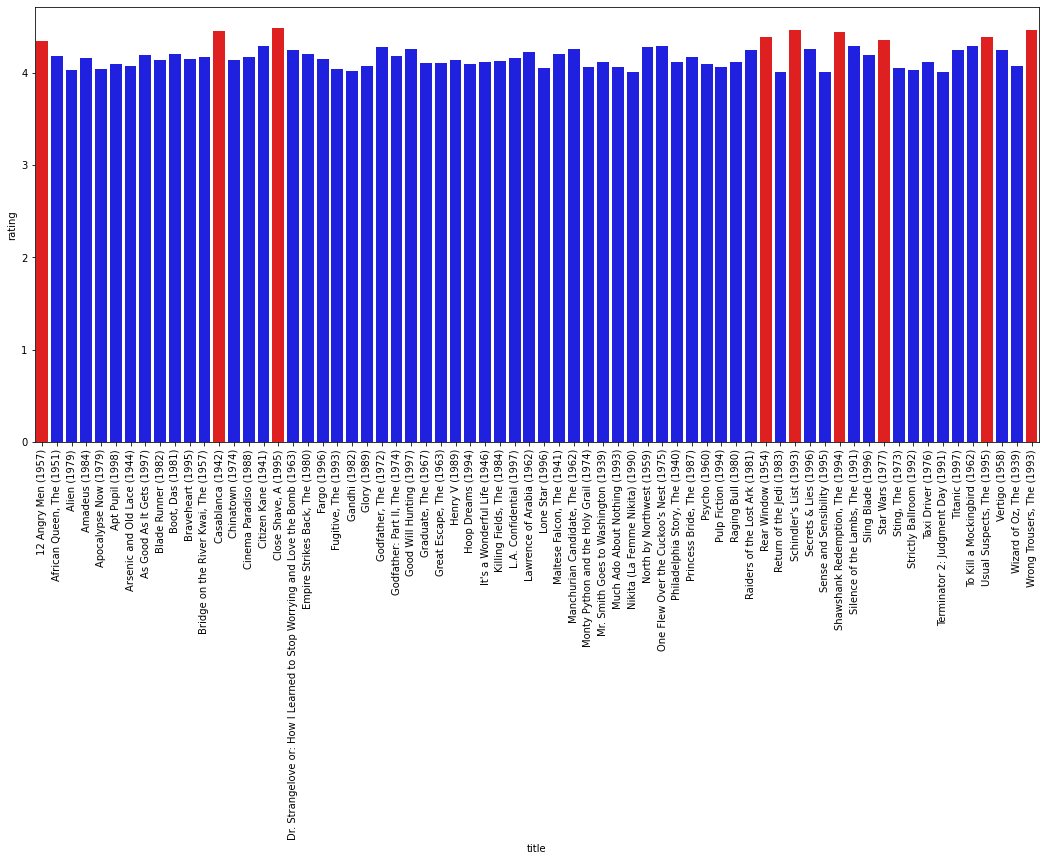

In [19]:
plt.figure(figsize=(18,8))
cols = ['red' if (i>4.3) else 'blue' for i in x.rating]
plt.xticks(rotation=90)
sns.barplot(x=x.index,y=x.rating,palette=cols)

Red colour indicates the movie rating is greater than 4.3 and blue colour indicates movie rating is between 4 and 4.3

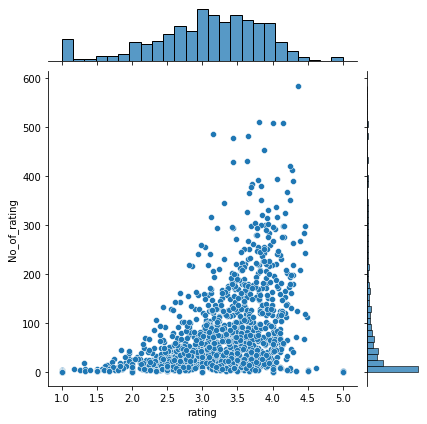

In [20]:
sns.jointplot(x='rating',y='No_of_rating',data = ratings)

## Recommendation

In [21]:
movie = data.pivot_table(index='userId',values ='rating',columns='title')
movie.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
movie.fillna(0,inplace=True)

In [23]:
ratings.sort_values('No_of_rating',ascending=False).head()

,rating,No_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


Lets grab ratings of starwars movie

In [24]:
starwar_ratings = movie["Star Wars (1977)"]
starwar_ratings.head()

userId
0    5.0
1    5.0
2    5.0
3    0.0
4    5.0
Name: Star Wars (1977), dtype: float64

We will use corrwith() method to get correlation between movies

In [25]:
similar_to_starwars = movie.corrwith(starwar_ratings)
similar_to_starwars

title
'Til There Was You (1997)               -0.009011
1-900 (1994)                            -0.009067
101 Dalmatians (1996)                    0.155314
12 Angry Men (1957)                      0.212583
187 (1997)                              -0.034787
                                           ...   
Young Guns II (1990)                     0.137382
Young Poisoner's Handbook, The (1995)   -0.002939
Zeus and Roxanne (1997)                 -0.007807
unknown                                  0.034445
Á köldum klaka (Cold Fever) (1994)       0.019045
Length: 1664, dtype: float64

In [26]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['corr'])
corr_starwars.head()

,corr
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787


In [27]:
corr_starwars.shape

(1664, 1)

In [28]:
corr_starwars.dropna(axis=0,inplace=True)
corr_starwars.shape

(1664, 1)

In [29]:
corr_starwars.sort_values('corr',ascending=False)

,corr
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
...,...
Anna Karenina (1997),-0.116310
"Smile Like Yours, A (1997)",-0.120460
I Know What You Did Last Summer (1997),-0.132151


In [30]:
corr_starwars['No_of_rating'] = ratings.No_of_rating
corr_starwars.head()

,corr,No_of_rating
title,,
'Til There Was You (1997),-0.009011,9
1-900 (1994),-0.009067,5
101 Dalmatians (1996),0.155314,109
12 Angry Men (1957),0.212583,125
187 (1997),-0.034787,41


In [31]:
corr_starwars[corr_starwars.No_of_rating>100].sort_values('corr',ascending=False).head()

,corr,No_of_rating
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331


If the user watching the movie "Starwars", then next movie recommended will be "Empire Strikes Back, The (1980)"

In [32]:
user_input = "'Til There Was You (1997)"

In [33]:
rate = movie[user_input]
correlation = movie.corrwith(rate)
recom = pd.DataFrame(correlation,columns=['corr'])
recom['No_of_rating'] = ratings.No_of_rating
a = recom[recom.No_of_rating>100].sort_values('corr',ascending=False)
print("watching Movie - ",user_input)
print("Recommended Movies are {}".format(a.iloc[1:4,0]))
#print(a.iloc[1:2,0])

watching Movie -  'Til There Was You (1997)
Recommended Movies are title
Last of the Mohicans, The (1992)    0.193242
Happy Gilmore (1996)                0.185145
Pretty Woman (1990)                 0.180753
Name: corr, dtype: float64
